### Course 02443: Stochastic Simulation - Exercises
**Authors: David Miles-Skov and Patrick Jensen Martins**

All written conclusions/explanations of solutions to problems within each exercise can be found in the relevant subsection in the following format:

**Problem i - Conclusion**

- Text in bullet points containing explanation/discussion of solution

Please refer to this for quick reading.

------------------------------

### Exercise 1:   Generation and testing of random numbers

In [189]:
# imports
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np
import seaborn as sns
import random

#### 1. Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.

Using the definition of an LCG as defined in the lecture:

$x_i = mod(a x_i + c, \ M)$

Providing a pseudo-random sample adhering to the uniform distribution $U(0,1)$ via the following: $U_i = \frac{x_i}{M}$

Implementing as a generator:

In [190]:
def LCG(M, a, c, seed, n):
    for i in range(n):
        seed = (a*seed+c)%M
        yield seed

def norm_LCG(X):
    m = max(X)
    return [i/m for i in X]

##### (a) Generate 10.000 (pseudo-) random numbers and present these numbers in a histogramme (e.g. 10 classes).

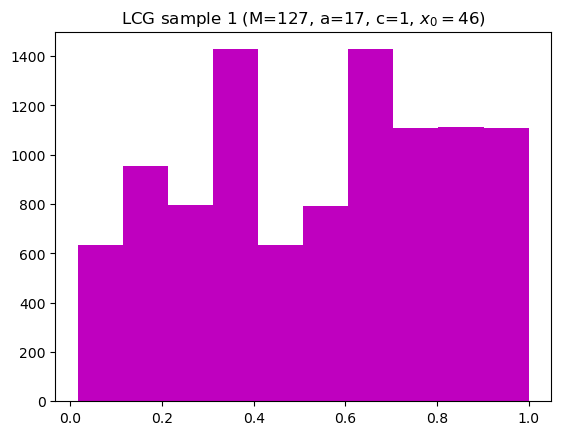

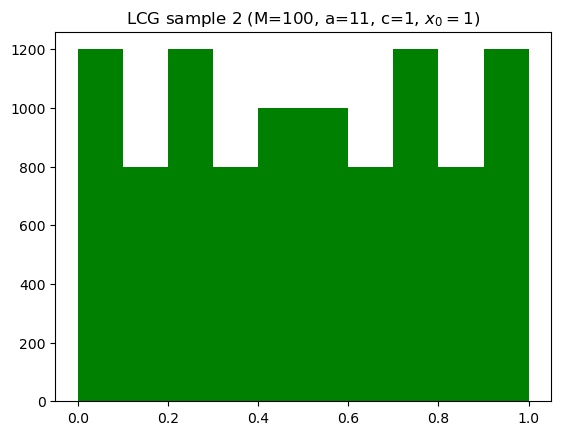

In [191]:
# Generating numbers

# LCG 1

M = 127
a = 17
c = 1
seed = 46

LCG_1 = norm_LCG(list(LCG(M, a, c, seed, 10000)))

# LCG 2

M = 100
a = 11
c = 1
seed = 1

LCG_2 = norm_LCG(list(LCG(M, a, c, seed, 10000)))


plt.hist(LCG_1, 10, color="m")
plt.title(r"LCG sample 1 (M=127, a=17, c=1, $x_0 =46$)")
plt.show()


plt.hist(LCG_2, 10, color="g")
plt.title(r"LCG sample 2 (M=100, a=11, c=1, $x_0 =1$)")
plt.show()

#### (b) - Evaluation

Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests - χ2 ,Kolmogorov-Smirnov, run-tests, and correlation test.

##### i) Graphical Descriptive Statistics

From the histograms we can see that both LCG generated samples do not produce a histogram that would be expected for a normal distribution. Thus, leading to the conclusion that the LCG with given parameters do not produce perfectly random samples (as expected).

Comparing with python's built-in random number generator:

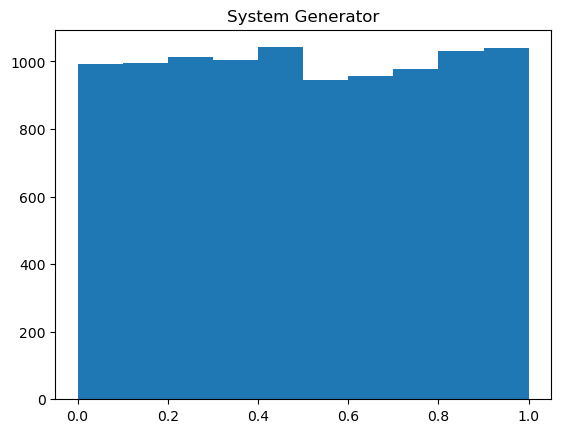

In [192]:
rand_system = [random.random() for _ in range(10000)]
plt.hist(rand_system, 10)
plt.title(r"System Generator")
plt.show()

Examining scatter plots of two samples

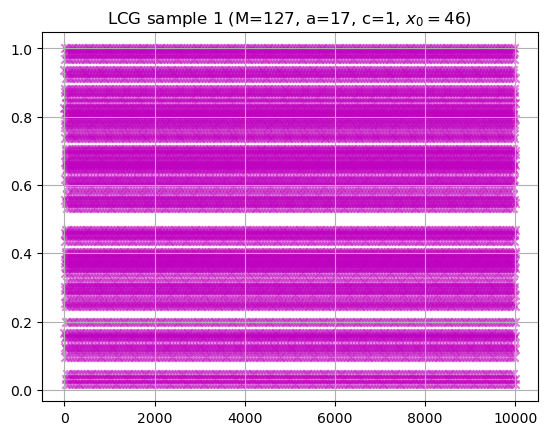

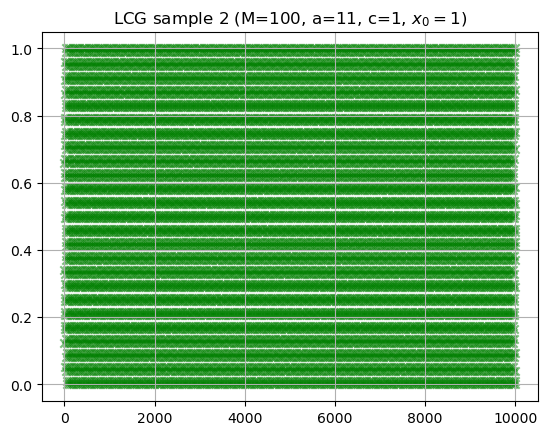

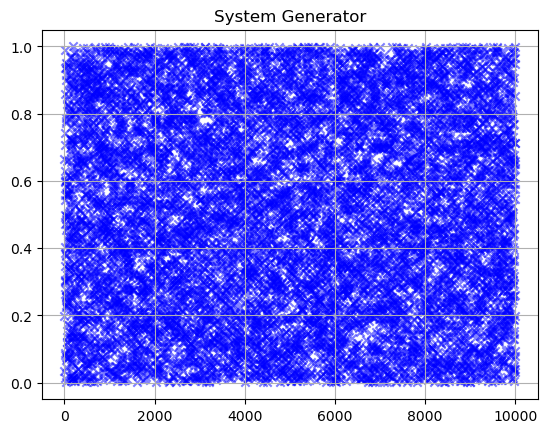

In [193]:
plt.scatter(list(range(10000)), LCG_1,alpha=0.5, marker="x", color="m")
plt.title(r"LCG sample 1 (M=127, a=17, c=1, $x_0 =46$)")
plt.grid()
plt.show()

plt.scatter(list(range(10000)), LCG_2, marker="x", color="g",alpha=0.5)
plt.title(r"LCG sample 2 (M=100, a=11, c=1, $x_0 =1$)")
plt.grid()
plt.show()

plt.scatter(list(range(10000)), rand_system, marker="x", color="b",alpha=0.5)
plt.title(r"System Generator")
plt.grid()
plt.show()

**Visual Tests - Conclusion**

Long bands of repeating values can be seen in the LCG, further confirming the lack of randomness.

#### ii) Evaluating Distribution
- 1: $\chi^2$ test
- 2: Kolmogorov-Smirnov test

Proceeding with $\chi^2$ test:

$H_0$: Bins have equal proportions $p_1 = p_2 = ... = p_{10} $

$H_1$: Proportions of bins not equal $p_1 \neq p_2 \neq .. \neq p_{10}$

$\alpha = 0.05$

Acceptance of the null hypothesis supports the "randomness" of the sample.

In [194]:
def chi_squared(numbers, num_bins):
    
    n_expected = len(numbers)/num_bins #  Uniform distribution -> Each "bin" has an equal number of values
    step = 1/num_bins
    test_stat = 0
    df = num_bins-1

    for i in range(1, num_bins+1):

        n_observed = len([j for j in numbers if j >= step*(i-1) and j <step*i])
        test_stat += ((n_expected-n_observed)**2)/n_expected
    
    p = 1 - stat.chi2.cdf(test_stat, df)
    
    return round(test_stat, 6), round(p, 6)

In [195]:
test_1_chi2, p_1 = chi_squared(LCG_1, 10)
test_2_chi2, p_2 = chi_squared(LCG_2, 10)
sys_gen_chi2, p_sys = chi_squared(rand_system, 10)
print(f"Test-statistic:\tP-value:\nLCG 1: {test_1_chi2}\t{p_1}\nLCG 2: {test_2_chi2}\t{p_2}\nBuilt-in: {sys_gen_chi2}\t{p_sys}")

Test-statistic:	P-value:
LCG 1: 797.099	0.0
LCG 2: 280.0	0.0
Built-in: 9.97	0.352919


**$\mathbf{\chi^2}$ Testing - Conclusion**

- The only sample where the null hypothesis is accepted is that generated by Python's built-in generator. 
- For the LCG generated samples, the null hypothesis is rejected - there is insufficient evidence (at the 5% significance level) to conclude that the bins have equal proportions.

Now proceeding with the Kolmogorov Smirnov test:
- $H_0$: Distribution is uniform
- $H_1$: Distribution is not uniform

In [196]:
def gen_ecdf(numbers):
    y = np.cumsum(numbers)/sum(numbers)
    return y


def kolmogorov_smirnov(numbers):

    x = np.sort(numbers)
    y = gen_ecdf(numbers)


    # Making ideal cdf 
    
    l, h = min(numbers), max(numbers)
    m, c =  (1/(h-l)), l/(l-h)
    ideal_y = [m*i+c for i in x] # Uniform distribution (ideal) -> linear cdf

    # For visual comparison
    
    plt.plot(x, ideal_y, label="Ideal CDF")
    plt.plot(x, y, label="ECDF")
    plt.legend()
    plt.ylabel(r"$P(X \leq x)$")
    plt.xlabel(r"$x$")
    plt.grid()
    plt.title("ECDF vs Ideal CDF")
    plt.show()


    D = max(abs(np.array(y) - np.array(ideal_y)))
    test_stat =  (np.sqrt(len(numbers)) + 0.12 + (0.11/np.sqrt(len(numbers)))) * D
    
    return test_stat

--- LCG 1 ---


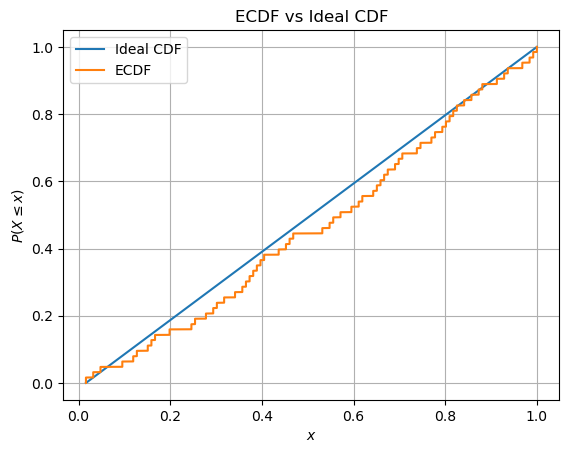

--- LCG 2 ---


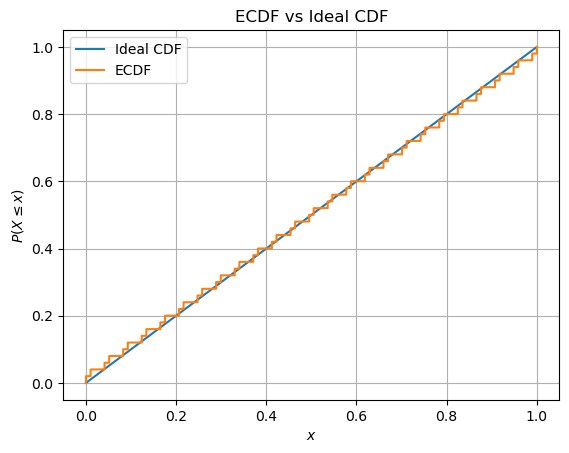

--- System Generator ---


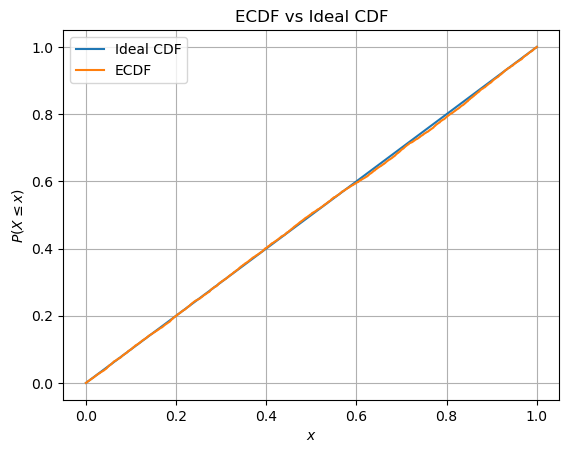

Test-statistics:
LCG 1: 8.089480857160012
LCG 2: 2.972667711340208
System Generator: 1.0747526316536657 



In [197]:
print("--- LCG 1 ---")
LCG_1_KS = kolmogorov_smirnov(LCG_1)
print("--- LCG 2 ---")
LCG_2_KS = kolmogorov_smirnov(LCG_2)
print("--- System Generator ---")
sys_KS = kolmogorov_smirnov(rand_system)
print(f"Test-statistics:\nLCG 1: {LCG_1_KS}\nLCG 2: {LCG_2_KS}\nSystem Generator: {sys_KS} \n")

**Kolmogorov-Smirnov Test - Conclusion**

- Refering to the table in slides, the critical value for the Kolmogorov-Smirnov test, at a signficance level of $\alpha = 0.05$, is $1.358$.
- Both LCG generated samples have a test statistic above the critical value. Therefore, the null hypothesis is rejected and there is sufficient evidence to conclude that the distributions of the LCG samples are not uniform.
- The system generator has a value below the critical value. Null hypothesis is accepted.

##### Tests for Correlation
- Visual tests
- Run tests
- Correlation tests

Visual tests - Plots of $U_i$ versus $U_{i+1}$

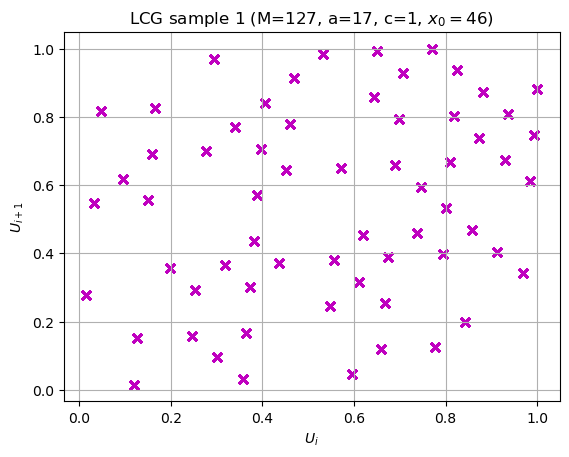

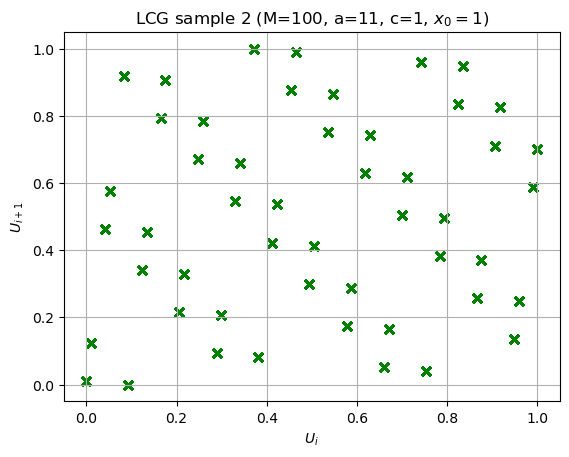

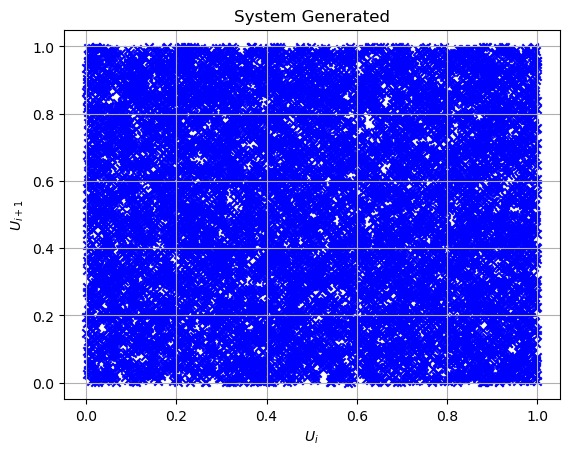

In [198]:
def partition_sample(data):
    U_i, U_i1 = [], []
    for i in range(len(data)-1):
        U_i.append(data[i])
        U_i1.append(data[i+1])
    return U_i, U_i1

LCG_1_Ui,LCG_1_Ui1 = partition_sample(LCG_1)
LCG_2_Ui,LCG_2_Ui1 = partition_sample(LCG_2)
sys_Ui,sys_Ui1 = partition_sample(rand_system)

plt.scatter(LCG_1_Ui, LCG_1_Ui1, marker="x", c="m")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"LCG sample 1 (M=127, a=17, c=1, $x_0 =46$)")
plt.show()


plt.scatter(LCG_2_Ui, LCG_2_Ui1, marker="x", c="g")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"LCG sample 2 (M=100, a=11, c=1, $x_0 =1$)")
plt.show()

plt.scatter(sys_Ui, sys_Ui1, marker="x", c="b")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"System Generated")
plt.show()

**Visual tests - Conclusion**

From the plots above, it is clear that the second LCG sample has a high level of correlation between adjacent sample points

Run test 1 - Above/Below:

$H_0$: Numbers were produced in an independent manner

$H_1$: Numbers were not produced in an independent manner

Test Statistic: $Z = \frac{R - \bar{R}}{s_R}$

Where: $\bar{R} = \frac{2 n_1 n_2}{n_1 + n_2} + 1$


And: $ s_R = \sqrt{\frac{2 n_1 n_2 (2 n_1 n_2 - n_1 - n_2)}{(n_1 + n_2)^2 (n_1 + n_2 + 1)}}$

Reject null hypothesis if:

$|\mathbf{Z}| > \mathbf{Z}_{1-\alpha}$


In [314]:
def run_test_1(numbers):

    median = np.median(np.array(numbers))
    n_1 = len([i for i in numbers if i > median])
    n_2 = len([i for i in numbers if i < median])

    runs_expected = 2*n_1*n_2/(n_1+n_2) + 1 # Mean

    g = lambda x: '>' if x > median else '<'
    above_below = [g(i) for i in numbers]
    # calculating number of runs

    R_a = 0
    R_b = 0


    
    for i in range(len(numbers)-1):
        if above_below[i]=='>' and above_below[i+1] == '<':
            R_a += 1
        elif above_below[i] == '<' and above_below[i+1] == '>':
            R_b += 1

        

    test_stat = R_a+R_b

    mu = 2*(n_1*n_2/(n_1+n_2))+1
    variance = 2*(n_1*n_2*(2*n_1*n_2 - n_1 - n_2))/(((n_1+n_2)**2)*(n_1+n_2-1))


    p_val = 1-2*stat.norm.cdf(test_stat, loc=mu, scale=np.sqrt(variance))

    return test_stat, round(p_val, 3)

In [315]:
LCG_1_run1_t, LCG_1_run1_p = run_test_1(LCG_1)
LCG_2_run1_t, LCG_2_run1_p = run_test_1(LCG_2)
sys_run1_t, sys_run1_p = run_test_1(rand_system)

print("--- Run Test 1 ---")
print(f"Sample:\tTest-statistic:\tP-value:\nLCG 1: {LCG_1_run1_t}\t{LCG_1_run1_p}\nLCG 2: {LCG_2_run1_t}\t{LCG_2_run1_p}\nSystem Generator: {sys_run1_t}\t{sys_run1_p}\n")



--- Run Test 1 ---
Sample:	Test-statistic:	P-value:
LCG 1: 4444	1.0
LCG 2: 4800	1.0
System Generator: 5099	-0.95



Run test 2 - Up/Down:

- Create vector $R = [r_{1}, r_{2}, ..., r_{n \geq 6}]^T$ where $r_i$ is the number of observed runs of length $i$.

- Calculate test statistic via the equation: $Z = \frac{1}{n-6} (\mathbf{R}-n\mathbf{B})^T A(\mathbf{R} - n \mathbf{B})$

where $A$ and $\mathbf{B}$ are provided.

In [280]:
def run_test_2(numbers):
    R = np.zeros(shape=6, dtype=np.int32)
    current_run = 1
    for i in range(1, len(numbers)):
        if numbers[i] < numbers[i-1]:
            if current_run >= 6:
                R[-1] += 1
            else:
                R[current_run-1] += 1
            current_run = 1
        else:
            current_run += 1
    
    R=R.T


    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840]).T
    A = np.array(
            [[4529.4, 9044.9, 13568, 18091, 22615, 27892],
             [9044.9, 18097, 27139, 36187, 45234, 55789], 
             [13568, 27139, 40721, 54281, 67852, 83685], 
             [18091, 36187, 54281, 72414, 90470, 111580], 
             [22615, 45234, 67852, 90470, 113262, 139476], 
             [27892, 55789, 83685, 111580, 139476, 172860]], dtype=float)
    n = len(numbers)
    Z1 = (R-n*B).T
    Z1 = np.matmul(Z1, A)
    Z2 = (R-n*B)
    Z = (1/(n-6))*np.matmul(Z1, Z2)

    return Z

The test statistic follows a $\chi^2(6)$ distribution (Comparing with 1 tailed)

In [281]:
LCG_1_run2 = run_test_2(LCG_1)
LCG_2_run2 = run_test_2(LCG_2)
sys_run2 = run_test_2(rand_system)

print("--- Run Test 2 ---")
print(f"Test-statistics:\nLCG 1: {LCG_1_run2}\nLCG 2: {LCG_2_run2}\nSystem Generator: {sys_run2}\n")

print(f"P-values:\nLCG 1: {1 - stat.chi2.cdf(LCG_1_run2, 6)}\nLCG 2: {1 - stat.chi2.cdf(LCG_2_run2, 6)}\nSystem Generator: {1 - stat.chi2.cdf(sys_run2, 6)}\n")


--- Run Test 2 ---
Test-statistics:
LCG 1: 511.52502776542707
LCG 2: 2387.9006340812325
System Generator: 4.384243612431381

P-values:
LCG 1: 0.0
LCG 2: 0.0
System Generator: 0.6248269851907173



Run test 3

In [283]:
def run_test_3(numbers):
    # converting 
    up_down_lst = []
    for i in range(len(numbers)-1):
        if numbers[i] < numbers[i+1]:
            up_down_lst.append("<")
        else:
            up_down_lst.append(">")
    
    # counting total runs
    X = 0
    for i in range(len(up_down_lst)-1):
        if up_down_lst[i] != up_down_lst[i+1]:
            X+=1
        
    n = len(numbers)

    Z = (X-(2*n-1)/3)/np.sqrt((16*n-29)/90)

    z_norm = (Z-0.25)/(7/(144*10000))

    return Z, z_norm

In [284]:
def calc_p_run_3(t):
    return 1 - 2*stat.norm.cdf(t)

LCG_1_run3, LCG_1_run3_norm = run_test_3(LCG_1)
LCG_2_run3, LCG_2_run3_norm = run_test_3(LCG_2)
sys_run3, sys_run3_norm = run_test_3(rand_system)

print("--- Run Test 3 ---")
print(f"Test-statistics:\nLCG 1: {LCG_1_run3}\nLCG 2: {LCG_2_run3}\nSystem Generator: {sys_run3}\n")
print(f"P-values:\nLCG 1: {calc_p_run_3(LCG_1_run3_norm)}\nLCG 2: {calc_p_run_3(LCG_2_run3_norm)}\nSystem Generator: {calc_p_run_3(sys_run3_norm)}\n")

--- Run Test 3 ---
Test-statistics:
LCG 1: -15.069618796793954
LCG 2: -25.292607833653655
System Generator: 0.3004436066517231

P-values:
LCG 1: 1.0
LCG 2: 1.0
System Generator: -1.0



**Run Tests - Conclusion**

- Higher quality random sample, results in a greater likelihood of passing run tests.

Correlation test

- Estimated correlation: $c_h = \frac{1}{n-h} \sum^{n-h}_{i=1} U_i U_{i+h} \sim N(0.25, \frac{7}{144n})$

In [290]:
def auto_corr(X, h):
    s = 0
    n = len(X)
    
    # Distribution has to be ~ U(0,1)
    m = max(X)
    U = [i/m for i in X]

    for i in range(n-h):
        s += U[i]*U[i+h]
    return s/(n-h)

In [291]:
print("----- Correlation test ----")

LCG_1_c = auto_corr(LCG_1, 1)
LCG_2_c = auto_corr(LCG_2, 1)
sys_c = auto_corr(rand_system, 1)
scale = np.sqrt(7/(144*10000))
print("Generator:\tTest statistic:\tP-value:")
print(f"LCG 1: {round(auto_corr(LCG_1, 1), 4)}\t{2*(1-stat.norm.cdf(LCG_1_c, loc=0.25, scale=scale))}")
print(f"LCG 2: {round(auto_corr(LCG_2, 1), 4)}\t{2*(1-stat.norm.cdf(LCG_2_c, loc=0.25, scale=scale))}")
print(f"System Generator: {round(auto_corr(rand_system, 1), 4)}\t{2*(1-stat.norm.cdf(sys_c, loc=0.25, scale=scale))}")


----- Correlation test ----
Generator:	Test statistic:	P-value:
LCG 1: 0.3132	0.0
LCG 2: 0.2594	2.2187107614701773e-05
System Generator: 0.2508	0.7334891032135551


**Correlation Test - Conclusion**

- Clear relationship between the "randomness" of the sample and the test-statistic/p-value

#### Making a very good LCG generator and performing all tests. 

(Based on *ZX81* computer)

Parameters:
- $M = 2^{16} + 1$
- $a = 75$
- $c = 74$

In [207]:
M = (2**16)+1
a = 75
c = 74

LCG_best = norm_LCG(list(LCG(M, a, c, 1, 10000)))

Histogram and scatter plot

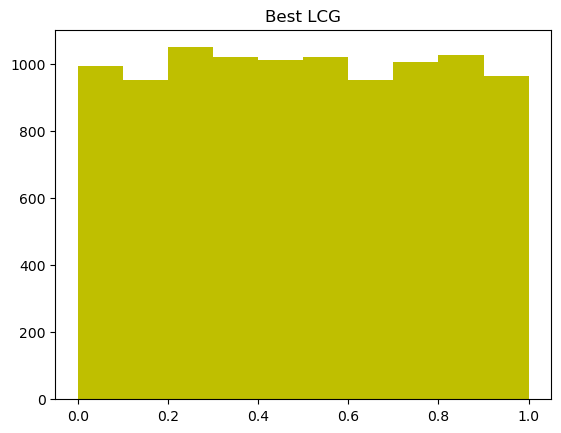

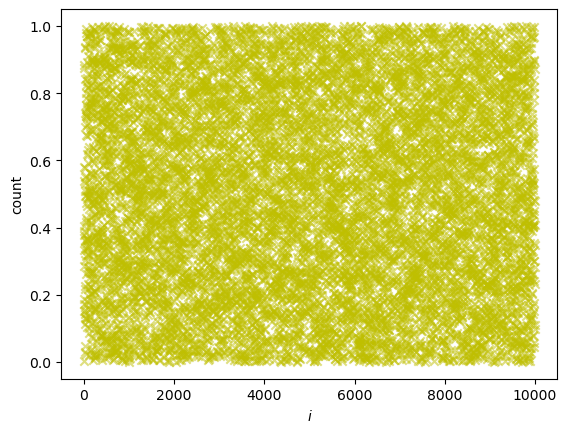

In [208]:
plt.hist(LCG_best, bins=10, color="y")
plt.title("Best LCG")
plt.show()

plt.scatter(list(range(10000)), LCG_best, marker="x", alpha=0.5, color="y")
plt.xlabel(r"$i$")
plt.ylabel(r"count")
plt.show()


Evaluating distribution

--- Chi squared ---
(10.757, 0.292734)
--- Kolmogorov-Smirnov ---


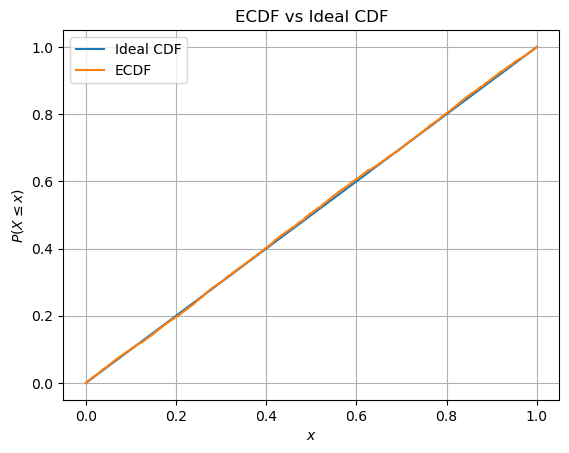

0.847678252523536


In [209]:
print("--- Chi squared ---")
print(chi_squared(LCG_best, 10))
print("--- Kolmogorov-Smirnov ---")
print(kolmogorov_smirnov(LCG_best))

Evaluating independence:

Visually

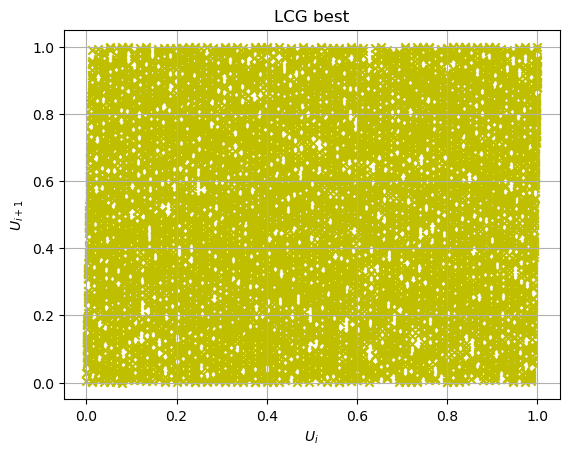

In [210]:
LCG_best_Ui,LCG_best_Ui1 = partition_sample(LCG_best)
plt.scatter(LCG_best_Ui, LCG_best_Ui1, marker="x", c="y")
plt.grid()
plt.ylabel(r"$U_{i+1}$")
plt.xlabel(r"$U_{i}$")
plt.title(r"LCG best")
plt.show()

Run tests

In [211]:
print(run_test_1(LCG_best))
print(run_test_2(LCG_best))
print(run_test_3(LCG_best))

2.3803570446325875
5.922304861879184
-1.8817257469238977


Correlation test

In [212]:
print(round(auto_corr(LCG_best, 1), 6))

0.250736


#### 2 - Evaluating System Available Generator

Apply a system available generator and perform the various statistical tests you did under Part 1 point (b) for this generator too.

(Incorporated with exercise 1)

#### 3 - Issue with Testing One Sample

You were asked to simulate one sample and perform tests on this sample. Discuss the sufficiency of this approach and take action, if needed.

- Performing tests on multiple samples to generate multiple statistical values (means, p-values of tests, run test values etc), and performing a statistical evaluation of these would give a more comprehensive overview of the performance of the generator as a whole.
- Current method only evaluates a single sample and is not representative of overall generator performance.
- Proceeding with generating $100$ samples using *LCG 2*, with size of $10000$.